# Exploring Spatio-Temporal Events using Public Football logs

### Citations:
https://www.nature.com/articles/s41597-019-0247-7

In [68]:
# Ensuring we are in the Correct Directory

import os
os.chdir('/Users/alijazibrizvi/Documents/Data Analytics/SoccermaticsInPython')

%matplotlib inline

# Helper Scripts: Loading in all Functions from these Files so we can Use them Quicklier
from utils import *
from plot_utils import *
from metrics import *

import warnings
warnings.filterwarnings('ignore')

Importing the `matches, events, players, and competition` datasets from the *figshare* repository.
Data are stored in ".json" format.

The dataset contains:
* 1,941 matches
* 3,251,294 events
* 4,299 players

In [70]:
data_download() # Downloads automatically from the Public Figshare Repo

Download completed


In [71]:
match_id2match, match_id2events, player_id2player, competition_id2competition, team_id2team = load_public_dataset()

In [74]:
[competition['name'] for competition in competition_id2competition.values()]

['Italian first division',
 'English first division',
 'Spanish first division',
 'French first division',
 'German first division',
 'European Championship',
 'World Cup']

## 4. Structure of the Data

### 4A: Players

In [78]:
a_player = list(player_id2player.keys())[0]
player_id2player[a_player]

{'passportArea': {'name': 'Turkey',
  'id': '792',
  'alpha3code': 'TUR',
  'alpha2code': 'TR'},
 'weight': 78,
 'firstName': 'Harun',
 'middleName': '',
 'lastName': 'Tekin',
 'currentTeamId': 4502,
 'birthDate': '1989-06-17',
 'height': 187,
 'role': {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalkeeper'},
 'birthArea': {'name': 'Turkey',
  'id': '792',
  'alpha3code': 'TUR',
  'alpha2code': 'TR'},
 'wyId': 32777,
 'foot': 'right',
 'shortName': 'H. Tekin',
 'currentNationalTeamId': 4687}

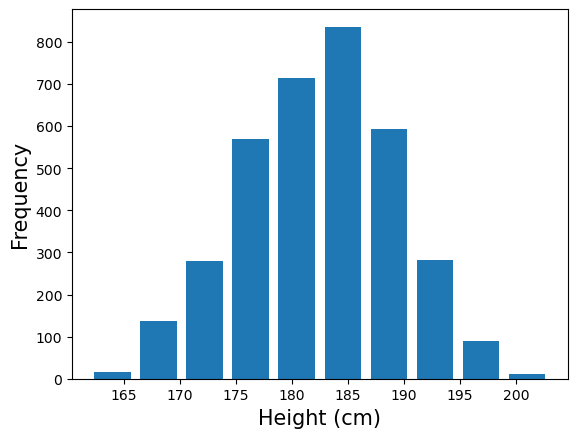

In [82]:
heights = [player['height'] for player in player_id2player.values() if player['height'] > 0]
plt.hist(heights, rwidth = 0.8)
plt.xlabel('Height (cm)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

### 4B: Competitions

In [86]:
first_comp = list(competition_id2competition.keys())[0]
competition_id2competition[first_comp]

{'name': 'Italian first division',
 'wyId': 524,
 'format': 'Domestic league',
 'area': {'name': 'Italy',
  'id': '380',
  'alpha3code': 'ITA',
  'alpha2code': 'IT'},
 'type': 'club'}

### 4C: Matches

In [91]:
a_match = list(match_id2match.keys())[0]
# match_id2match[a_match] 

## Counting Goals Scored Throughout a Season

In [98]:
match_id2match[a_match]['label']

'Lazio - Internazionale, 2 - 3'

In [142]:
sum_goals = 0

for match_id, match in match_id2match.items():
    if 'label' in match:
        goals = match['label'].split(', ')[1].split(' - ')
        goals = [int(goal) for goal in goals]
        sum_goals += sum(goals)

sum_goals

1017

## Average Goals Scored per Match

In [147]:
goals_in_match = []

for match_id, match in match_id2match.items():
    if 'label' in match:
        goals = match['label'].split(', ')[1].split(' - ')
        goals = [int(goal) for goal in goals]
        goals_in_match.append(sum(goals))
        
round(np.mean(goals_in_match), 2)

2.68

### 4D: Events

In [150]:
match_id2events[a_match][0]

{'eventId': 8,
 'subEventName': 'Simple pass',
 'tags': [{'id': 1801}],
 'playerId': 3344,
 'positions': [{'y': 50, 'x': 49}, {'y': 58, 'x': 38}],
 'matchId': 2576335,
 'eventName': 'Pass',
 'teamId': 3161,
 'matchPeriod': '1H',
 'eventSec': 2.4175900000000183,
 'subEventId': 85,
 'id': 253668302}

## Listing Distinct Combinations of Event Types and Subtypes

In [153]:
event_types = []

for match_id, events in match_id2events.items():
    for event in events:
        event_types.append((event['eventName'], event['subEventName']))

set(event_types)

{('Duel', 'Air duel'),
 ('Duel', 'Ground attacking duel'),
 ('Duel', 'Ground defending duel'),
 ('Duel', 'Ground loose ball duel'),
 ('Foul', 'Foul'),
 ('Foul', 'Hand foul'),
 ('Foul', 'Late card foul'),
 ('Foul', 'Out of game foul'),
 ('Foul', 'Protest'),
 ('Foul', 'Simulation'),
 ('Foul', 'Time lost foul'),
 ('Foul', 'Violent Foul'),
 ('Free Kick', 'Corner'),
 ('Free Kick', 'Free Kick'),
 ('Free Kick', 'Free kick cross'),
 ('Free Kick', 'Free kick shot'),
 ('Free Kick', 'Goal kick'),
 ('Free Kick', 'Penalty'),
 ('Free Kick', 'Throw in'),
 ('Goalkeeper leaving line', 'Goalkeeper leaving line'),
 ('Interruption', 'Ball out of the field'),
 ('Interruption', 'Whistle'),
 ('Offside', ''),
 ('Others on the ball', 'Acceleration'),
 ('Others on the ball', 'Clearance'),
 ('Others on the ball', 'Touch'),
 ('Pass', 'Cross'),
 ('Pass', 'Hand pass'),
 ('Pass', 'Head pass'),
 ('Pass', 'High pass'),
 ('Pass', 'Launch'),
 ('Pass', 'Simple pass'),
 ('Pass', 'Smart pass'),
 ('Save attempt', 'Reflexes'

## 5: Basic Statistics

### 5A: Frequency of Events per Type
For each event type, we plot how frequent it is in the `events` dataset.

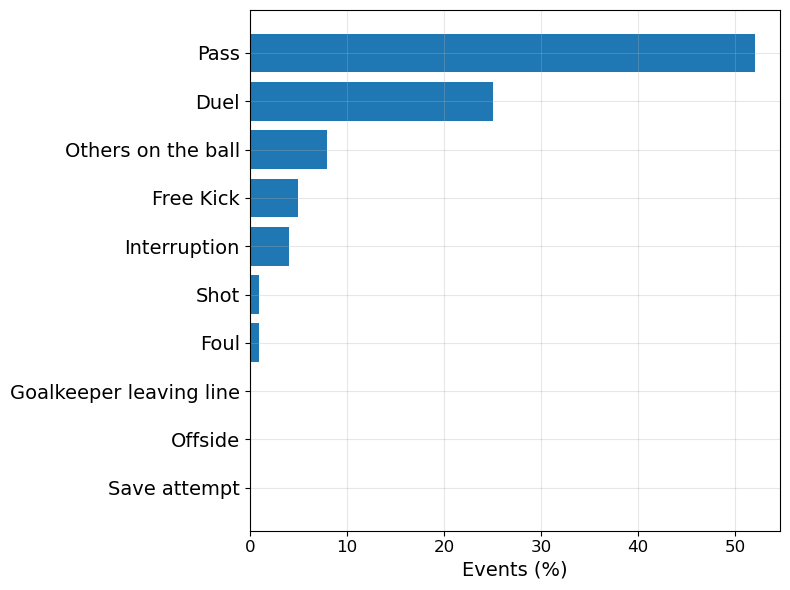

In [159]:
from collections import Counter
import operator
import numpy as np
import matplotlib.pyplot as plt

events_list = []

for match_id, events in match_id2events.items():
    for event in events:
        events_list.append(event['eventName'])

count = Counter(events_list)

# Expressing Frequency as a Percentage (%)
counter = {}
for event_name, n_events in count.items():
    counter[event_name] = int(float(n_events) / len(events_list) * 100)

# Convert to sorted list of tuples
sorted_d = sorted(counter.items(), key=operator.itemgetter(1), reverse=False)

# Unzip into two lists
labels, values = zip(*sorted_d)

# Bar Plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.barh(labels, values)
plt.xlabel('Events (%)', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.grid(alpha=0.3)
fig.tight_layout()
plt.show()

### 5B: Distribution of the Number of Events per Match

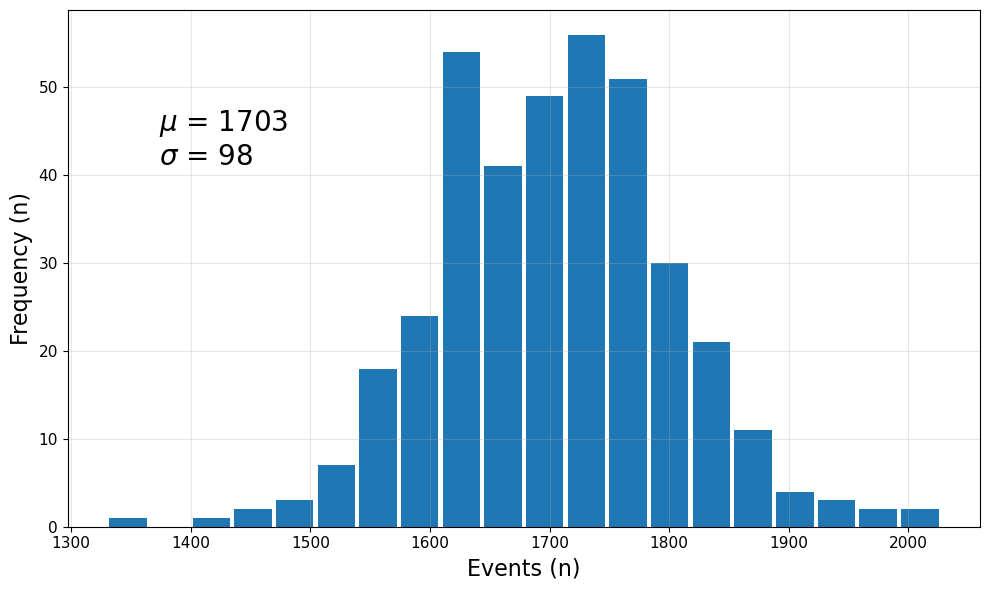

In [164]:
values = [len(events) for events in match_id2events.values()]
avg_n_events = np.mean(values)
std_n_events = np.std(values)

fig, ax = plt.subplots(figsize = (10, 6))
plt.hist(values, rwidth = 0.9, bins = 20)
plt.grid(alpha = 0.3)
plt.yticks(fontsize = 11)
plt.xlabel('Events (n)', fontsize = 16)
plt.ylabel('Frequency (n)', fontsize = 16)
plt.xticks(fontsize = 11)
plt.text(0.1, 0.7,
         '$\mu$ = %i\n$\sigma$ = %i'%(avg_n_events, std_n_events),
         fontsize = 20, transform = ax.transAxes)
fig.tight_layout()
plt.show()

## 6: Plot Events on the Field

In [209]:
match_id = 2576311 # A Random Single Match
match_events = match_id2events[match_id]
match_label = match_id2match[match_id]['label']

match_df = pd.DataFrame(match_events)
match_df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],89186,"[{'y': 48, 'x': 47}, {'y': 49, 'x': 43}]",2576311,Pass,3159,1H,3.134536,85,249276211
1,8,Simple pass,[{'id': 1801}],20470,"[{'y': 49, 'x': 43}, {'y': 27, 'x': 44}]",2576311,Pass,3159,1H,3.705059,85,249276212
2,8,Simple pass,[{'id': 1801}],25437,"[{'y': 27, 'x': 44}, {'y': 4, 'x': 36}]",2576311,Pass,3159,1H,5.816077,85,249276213
3,8,Simple pass,[{'id': 1801}],20588,"[{'y': 4, 'x': 36}, {'y': 8, 'x': 58}]",2576311,Pass,3159,1H,7.694578,85,249276214
4,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",70084,"[{'y': 8, 'x': 58}, {'y': 10, 'x': 54}]",2576311,Duel,3159,1H,10.018276,11,249276215


### 6A: Static Plot

In [211]:
match_df['x_start'] = [x[0]['x'] for x in match_df['positions']]
match_df['y_start'] = [x[0]['y'] for x in match_df['positions']]

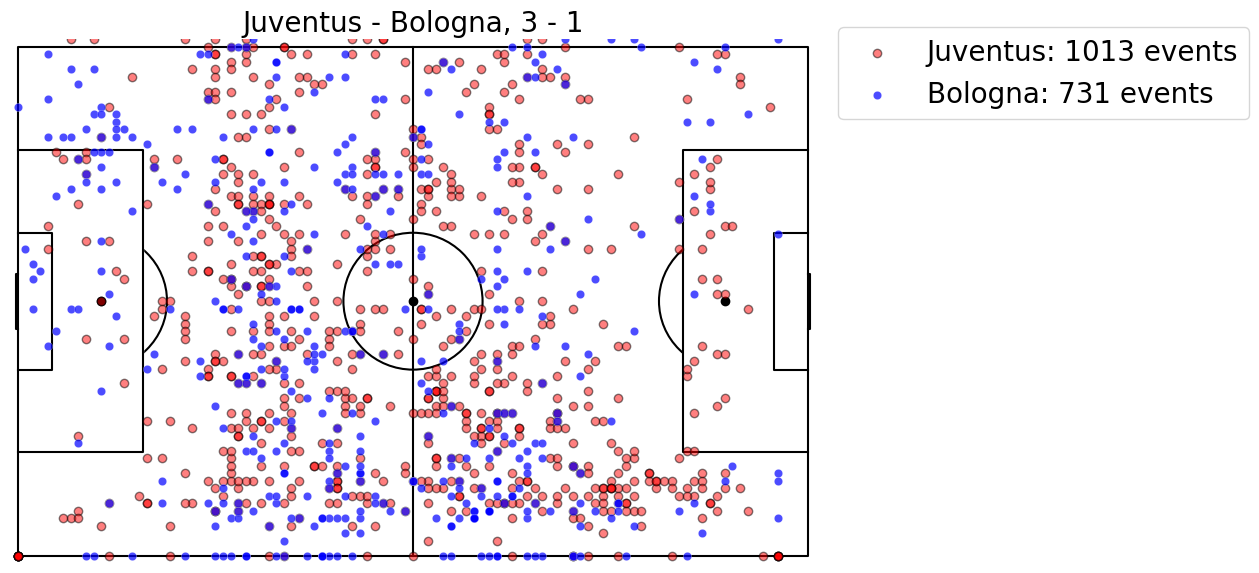

In [213]:
team1, team2 = np.unique(match_df['teamId'])

df_team1 = match_df[match_df['teamId'] == team1]
df_team2 = match_df[match_df['teamId'] == team2]

# The Pitch Plot
f = draw_pitch('white', 'black', 'h', 'full')
plt.scatter(df_team1['x_start'], df_team1['y_start'], c = 'red', edgecolors = 'k', zorder = 12,
            alpha = 0.5, label = '%s: %s events' %(team_id2team[team1]['name'], len(df_team1)))
plt.scatter(df_team2['x_start'], df_team2['y_start'], c = 'blue', edgecolors = 'w', linewidth = 0.25, zorder = 12,
            alpha = 0.7, label = '%s: %s events' %(team_id2team[team2]['name'], len(df_team2)))
plt.legend(fontsize = 20, bbox_to_anchor = (1.01, 1.05))
plt.title(match_label, fontsize = 20)
plt.show()

## 7: Spatial Distribution of Events

The darker the green, the more the number of events that occurred in that area of the pitch.

In [220]:
def plot_kde_events_on_field(sample_size = 10000):
    """
    Generate density plots on the field for each event type
    
    Parameters
    ----------
    sample_size: int
        random sample of values to use (default: 10000). The code becomes slow is you increase this value
        significantly.
    """
    positions = []
    for match_events in match_id2events.values():
        for event in match_events:
            positions.append([event['eventName'], 
                              event['positions'][0]['x'], 
                              event['positions'][0]['y']])

    positions_df = pd.DataFrame(positions, columns=['eventName','x','y'])

    for event_type in EVENT_TYPES:
        pos_event_df = positions_df[positions_df['eventName'] == event_type]
        fig, ax = pitch()
        if len(pos_event_df) >= sample_size:
            x_y = pos_event_df[['x','y']].sample(sample_size).astype(float)
        else:
            x_y = pos_event_df[['x','y']].astype(float)
        
        sns.kdeplot(x = x_y['x'], y = x_y['y'], cmap = 'Greens', shade = True)
        
        plt.title(event_type, fontsize = 30)
        plt.xlim(-1,101)
        plt.ylim(-1,101)
        plt.axis('off')
        fig.tight_layout()
        plt.show()

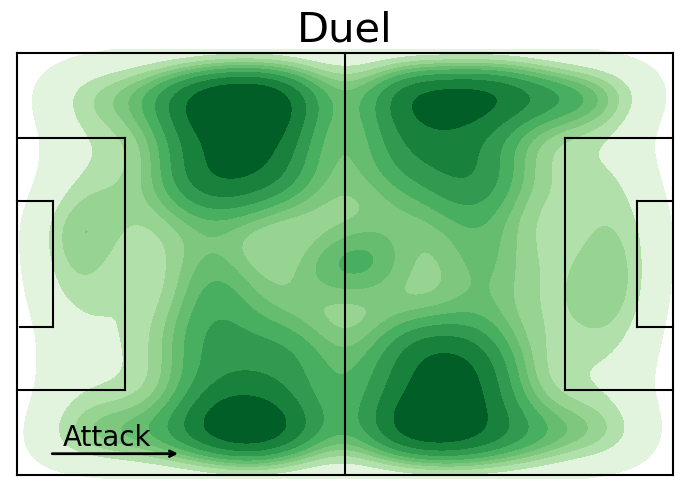

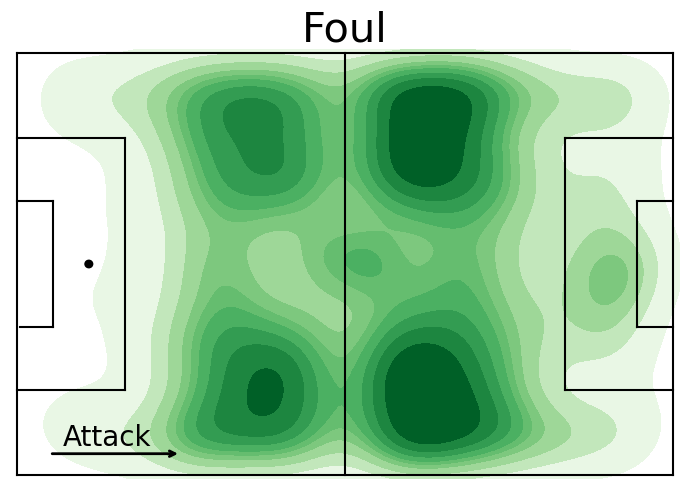

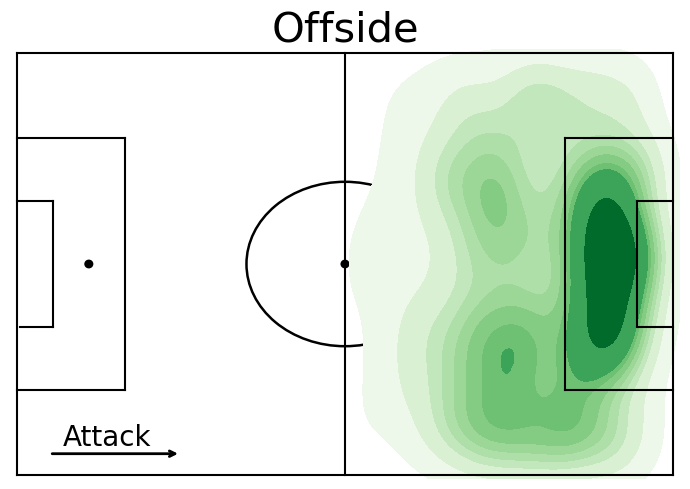

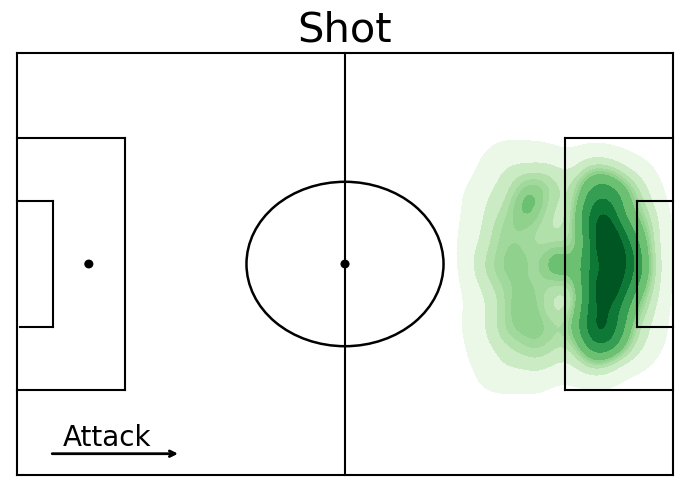

In [222]:
plot_kde_events_on_field(sample_size = 10000)

## 8: Evolution of Number of Events Across Time Periods in the Match

Intra-match evolution of number of events, with time windows of 5 minutes across the course of the match.

In [232]:
def in_match_evolution(event_name = 'Goal', event_tag = 101):
    """
    Plot the in-match evolution of the number of events of a specific type.
    
    Parameters
    ----------
    event_name : str, optional
        the type of event to plot. The default is "Goal".
        
    event_tag : int, optional
        the type of tag to plot. The default is 101.
    """
    # slect specific event in accordance with event_tag
    events_time = []
    for match_id, match_events in match_id2events.items():
        for event in match_events:
            tags = event['tags']
            for tag in tags:
                if tag['id'] == event_tag:
                    events_time.append([event['matchId'], 
                                        event['matchPeriod'], 
                                        event['eventSec']])
                
    # let us convert it into a DataFrame
    event_df = pd.DataFrame(events_time, columns = ['matchId','matchPeriod','eventSec'])
    
    # create figure
    fig, ax = plt.subplots(figsize=(8,6))
    
    start_bin_2h = 11
    
    # define plot characteristics for 1H e 2H
    for half, color_bar in zip(['1H','2H'],['blue','green']):
        
        # define DataFrame per half time
        df_half = event_df[event_df['matchPeriod'] == half].sort_values(['matchPeriod','eventSec'])
        
        # create bins every 5 minutes
        df_half['binned'] = df_half['eventSec'].pipe(lambda x: pd.to_timedelta(x, "s")).dt.floor("5min").astype("category").cat.codes
        
        # merge bins up to 45 minutes 
        df_half['binned'] = [9 if x>9 else x for x in df_half['binned']]
        
        # plot bin for second half
        if half == '2H':
            df_half['binned'] = [x+start_bin_2h for x in df_half['binned']]
            
        # barplot
        count = Counter(df_half.binned)
        barlist = plt.bar(count.keys(),count.values(),
                          label = half,color=color_bar)
        
    plt.legend(loc = 2, fontsize = 15, frameon = True, shadow = True)
    plt.xticks(list(range(0, 21)),['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','>45','',
                                  '45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','>90'],
              rotation = 90, fontsize = 18)
    plt.yticks(fontsize = 18)
    max_count_value = np.max(list(count.values()))
    plt.text(9.65, max_count_value-(max_count_value/100*10), 'half time', rotation=90, 
             bbox=dict(facecolor='w',edgecolor='r'),
             verticalalignment='center', horizontalalignment='left', fontsize=15, 
             color='tomato')
    plt.vlines(10, 0, max_count_value+(max_count_value/100*10),colors='r',alpha=0.5)
    plt.ylim(0,max_count_value+(max_count_value/100*10))
    plt.xlabel('match time (min)', fontsize = 25)
    plt.ylabel('%s (n)'%event_name, fontsize=25)
    plt.grid(alpha=0.3)
    fig.tight_layout()
    plt.show()

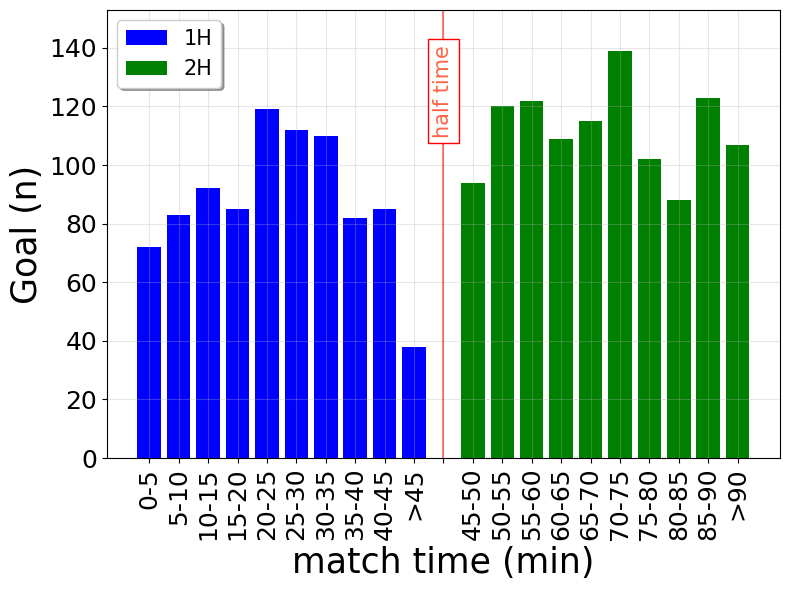

In [234]:
# Intra-Match Evolution of Goals Scored in Matches
in_match_evolution(event_name = 'Goal', event_tag = 101)

In [ ]:
# For Red Cards
in_match_evolution(event_name = 'Red Card', event_tag=101)